<a href="https://colab.research.google.com/github/YusriaAhmed/YusriaAhmed/blob/main/brain_tumor_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from PIL import Image
import os
from IPython.display import display
import zipfile
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Loading data and Image Augmentation
source_zip_path = '/content/archive (2).zip'

destination_folder_path = '/content/drive/MyDrive/<drive>'

!mv "/content/archive (2).zip" "/content/drive/MyDrive"

In [ ]:
# Loading data and Image Augmentation
zip_file_path = '/content/drive/MyDrive/<drive>/archive (2).zip'

destination_folder_path = '/content/drive/MyDrive/<drive>/extracted_folder'

with zipfile.ZipFile('/content/drive/MyDrive/archive (2).zip', 'r') as zip_ref:
    zip_ref.extractall(destination_folder_path)

In [ ]:
# Loading data and Image Augmentation
image_folder_path = '/content/drive/MyDrive/<drive>/extracted_folder'


image_files = [file for file in os.listdir('/content/drive/MyDrive/<drive>/extracted_folder/Training') if file.endswith('.jpg') or file.endswith('.png')]

for file in image_files:
    file_path = os.path.join('/content/drive/MyDrive/<drive>/extracted_folder/Training', file)


    image = Image.open(file_path)
    resized_image = image.resize((256, 256))
    resized_image.show()


In [ ]:
# Loading data and Image Augmentation
image_folder_path = '/content/drive/MyDrive/<drive>/extracted_folder'

image_files = [file for file in os.listdir(image_folder_path) if file.endswith('.jpg') or file.endswith('.png')]


for file in image_files:
    file_path = os.path.join(image_folder_path, file)
    image = Image.open(file_path)
    display(image)

In [ ]:
# Loading data and Image Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/<drive>/extracted_folder/Training',
                                                    batch_size=30,
                                                    target_size=(150, 150))
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/<drive>/extracted_folder/Testing',
                                                         batch_size=30,
                                                         target_size=(150, 150))

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
labels_2=['notumor', 'pituitary', 'glioma',' meningioma']

In [ ]:
# Display the count of each unique classes
labels = validation_generator.labels
labels_series = pd.Series(labels)

value_counts = labels_series.value_counts()

print(value_counts)

2    405
1    306
0    300
3    300
dtype: int64


In [ ]:
# Display the count of each unique classes
labels = train_generator.labels
labels_series = pd.Series(labels)

value_counts = labels_series.value_counts()

print(value_counts)

2    1595
3    1457
1    1339
0    1321
dtype: int64


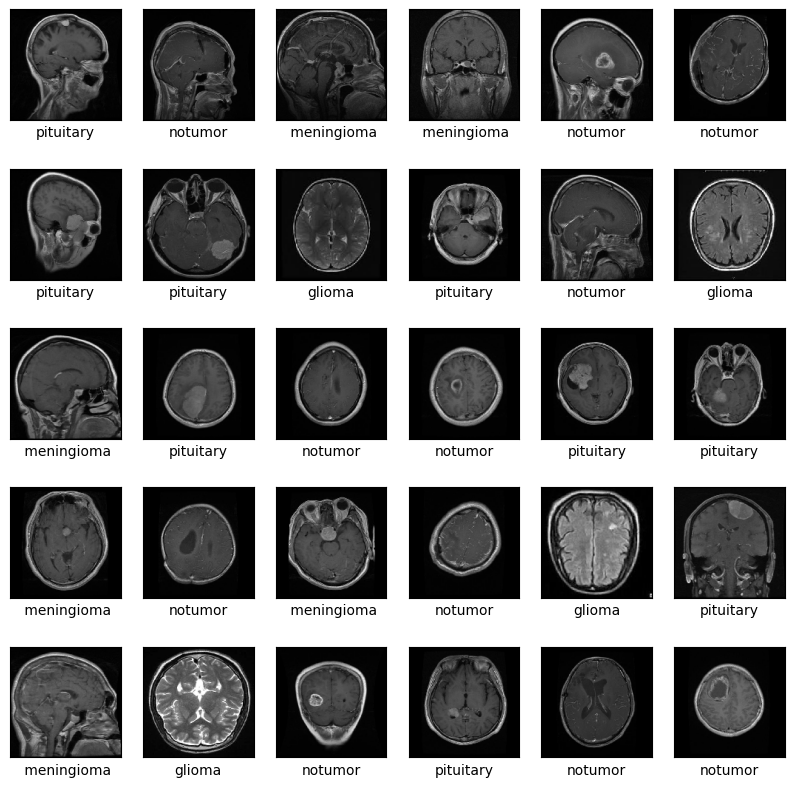

In [ ]:
# Display some images
i = 0

batch_size = validation_generator.batch_size
if i < len(validation_generator):
    batch_images, batch_labels = validation_generator[i]
    plt.figure(figsize=(10,10))
    for idx in range(batch_size):
        plt.subplot(5, 6, idx + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        plt.imshow(batch_images[idx])
        class_index = np.argmax(batch_labels[idx])
        class_name = labels_2[class_index]
        plt.xlabel(class_name)

        if idx >= batch_size - 1:
            break
else:
    print("Invalid batch index!")

In [ ]:
# Building model

model=Sequential()

model.add(Conv2D(filters=50,
                 kernel_size=5,
                 strides=1,
                 activation='relu',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=2,strides=2))



model.add(Conv2D(filters=100,
                 kernel_size=5,
                 strides=1,
                 activation='relu'))

model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Flatten())
model.add(Dropout(0.5))


model.add(Dense(150, activation='relu'))
model.add(Dense(4,activation='softmax'))

# Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 50)      3800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 100)       125100    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 100)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 115600)            0         
                                                                 
 dropout (Dropout)           (None, 115600)            0

In [ ]:
# Training Model
history=model.fit(train_generator, epochs=10,validation_data=validation_generator)

Epoch 1/10
191/191 [==============================] - 1476s 8s/step - loss: 0.6457 - accuracy: 0.7468 - val_loss: 0.4762 - val_accuracy: 0.8009
Epoch 2/10
191/191 [==============================] - 24s 126ms/step - loss: 0.3023 - accuracy: 0.8922 - val_loss: 0.3686 - val_accuracy: 0.8391
Epoch 3/10
191/191 [==============================] - 24s 124ms/step - loss: 0.1970 - accuracy: 0.9261 - val_loss: 0.2281 - val_accuracy: 0.9100
Epoch 4/10
191/191 [==============================] - 22s 116ms/step - loss: 0.1446 - accuracy: 0.9503 - val_loss: 0.1929 - val_accuracy: 0.9283
Epoch 5/10
191/191 [==============================] - 24s 123ms/step - loss: 0.1105 - accuracy: 0.9597 - val_loss: 0.1885 - val_accuracy: 0.9367
Epoch 6/10
191/191 [==============================] - 23s 118ms/step - loss: 0.0753 - accuracy: 0.9718 - val_loss: 0.1511 - val_accuracy: 0.9466
Epoch 7/10
191/191 [==============================] - 23s 122ms/step - loss: 0.0645 - accuracy: 0.9772 - val_loss: 0.2154 - val_acc

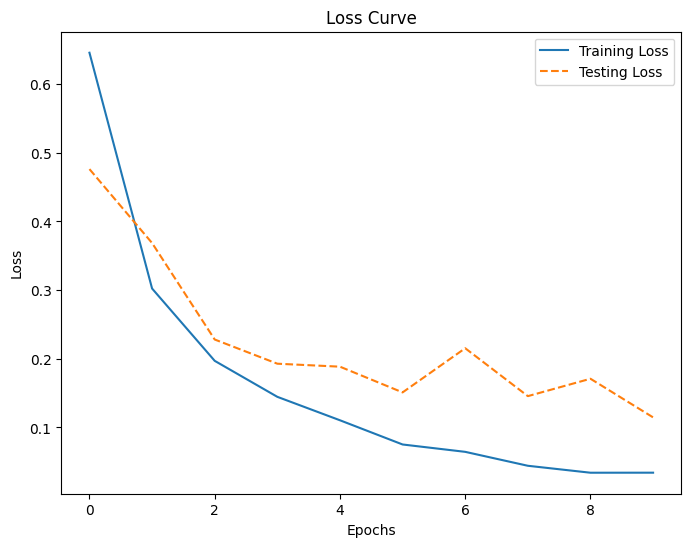

In [ ]:
# Loss Curves

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

plt.show()

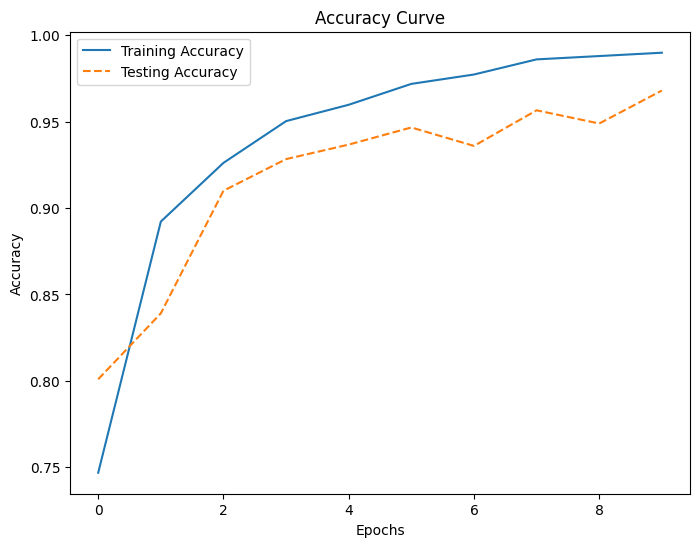

In [ ]:
# Accuracy Curves

plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")

plt.show()

In [ ]:
# Model Evaluation
model.evaluate(validation_generator)

44/44 [==============================] - 4s 85ms/step - loss: 0.1147 - accuracy: 0.9680


[0.11472178995609283, 0.9679633975028992]

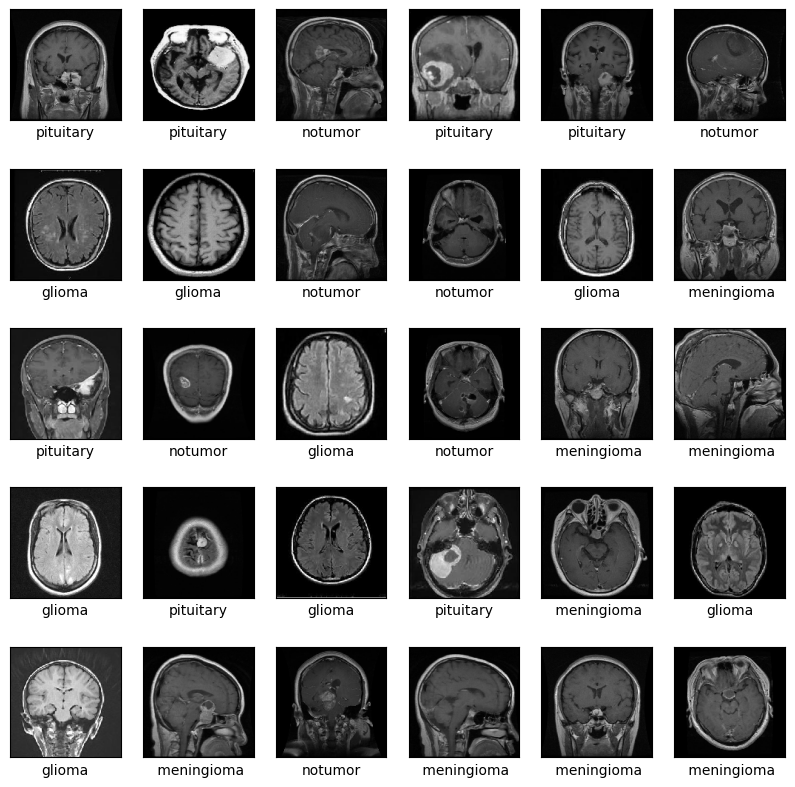

In [ ]:
# predict some records
i = 0

batch_size = validation_generator.batch_size

if i < len(validation_generator):
    batch_images, batch_labels = validation_generator[i]
    plt.figure(figsize=(10,10))
    for idx in range(batch_size):
        plt.subplot(5, 6, idx + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch_images[idx])
        class_index = np.argmax(batch_labels[idx])
        class_name = labels_2[class_index]
        plt.xlabel(class_name)

        if idx >= batch_size - 1:
            break
else:
    print("Invalid batch index!")